## Vacuum Neutrino Oscillations

Here is a notebook for homogeneous gas model.

Here we are talking about a homogeneous gas bulk of neutrinos with single energy. The EoM is
$$
i \partial_t \rho_E = \left[ \frac{\delta m^2}{2E}B ,\rho_E \right]
$$

while the EoM for antineutrinos is
$$
i \partial_t \bar\rho_E = \left[- \frac{\delta m^2}{2E}B ,\bar\rho_E \right]
$$

Initial:
Homogeneous, Isotropic, Monoenergetic $\nu_e$ and $\bar\nu_e$

The equations becomes
$$
i \partial_t \rho_E = \left[ \frac{\delta m^2}{2E} B  ,\rho_E \right]
$$
$$
i \partial_t \bar\rho_E = \left[- \frac{\delta m^2}{2E}B,\bar\rho_E \right]
$$



Define $\omega=\frac{\delta m^2}{2E}$,  $\omega = \frac{\delta m^2}{-2E}$, $\mu=\sqrt{2}G_F n_\nu$
$$
i \partial_t \rho_E = \left[ \omega B ,\rho_E \right]
$$
$$
i \partial_t \bar\rho_E = \left[\bar\omega B,\bar\rho_E \right]
$$


where

$$
B = \frac{1}{2} \begin{pmatrix} 
-\cos 2\theta_v & \sin 2\theta_v \\
\sin 2\theta_v & \cos 2\theta_v
\end{pmatrix}
$$

or just use theta =0.2rad


$$
L = \begin{pmatrix}
1 & 0 \\
0 & 0
\end{pmatrix}
$$

Initial condition 
$$
\rho(t=0) = \begin{pmatrix}
1 & 0 \\
0 & 0
\end{pmatrix}
$$

$$
\bar\rho(t=0) =\begin{pmatrix}
1 & 0 \\
0 & 0
\end{pmatrix}
$$

define the following quantities

1. hbar$=\hbar$
%2. delm2E$= \delta m^2/2E$
%3. lamb $= \lambda$, lambb $= \bar\lambda$
%4. gF $= G_F$
%5. mu $=\mu$
6. omega $=\omega$, omegab $=-\bar\omega$

## Numerical

In [1]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. More about that later. 
# If you are using an old version of IPython, try using '%pylab inline' instead.
%matplotlib inline
%load_ext snakeviz

import numpy as np
from scipy.optimize import minimize
from scipy.special import expit
import matplotlib.pyplot as plt

from matplotlib.lines import Line2D

import timeit

import pandas as pd

import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls

In [2]:
# hbar=1.054571726*10**(-34)
hbar=1.0
delm2E=1.0
# lamb=1.0  ## lambda for neutrinos
# lambb=1.0 ## lambda for anti neutrinos
# gF=1.0
# nd=1.0  ## number density
# ndb=1.0   ## number density
omega=1.0
omegab=-1.0

## Here are some matrices to be used

elM = np.array([[1.0,0.0],[0.0,0.0]])
#bM = 1.0/2*np.array( [ [ - 0.38729833462,0.31622776601] , [0.31622776601,0.38729833462] ] )
bM = 1.0/2*np.array( [ [ -np.cos(0.4),np.sin(0.4)] , [np.sin(0.4),np.cos(0.4)] ] )

print bM
## sqareroot of 2
sqrt2=np.sqrt(2.0)

[[-0.4605305   0.19470917]
 [ 0.19470917  0.4605305 ]]


I am going to substitute all density matrix elements using their corrosponding network expressions.

So first of all, I need the network expression for the unknown functions.

A function is written as

$$ y_i= initial+t_i v_k f(t_i w_k+u_k) ,$$

while it's derivative is

$$v_k f(t w_k+u_k) + t v_k f(tw_k+u_k) (1-f(tw_k+u_k)) w_k .$$

Now I can write down the equations using these two forms.

In [3]:
def trigf(x):
    #return 1/(1+np.exp(-x)) # It's not bad to define this function here for people could use other functions other than expit(x).
    return expit(x)

rho = [[r11, a+ib ], [a-ib,r22]], the following rho4 function is rho4 = [r11,a, b, r22]

In [4]:
## The time derivative part

### Here are the initial conditions

init = np.array( [1.0, 0.0, 0.0, 0.0] )
#init = np.array( [[1,2],[3,4]] )

### For neutrinos

def rho4(x,ti,initialCondition): # x is the input structure arrays, ti is a time point

    elem11 = np.sum(ti * x[0] * trigf( ti*x[1] + x[2] ) )
    elem12 = np.sum(ti * x[3] * trigf( ti*x[4] + x[5] ) )
    elem21 = np.sum(ti * x[3] * trigf( ti*x[4] + x[5] ) )
    elem22 = np.sum(ti * x[9] * trigf( ti*x[10] + x[11] ) )
    
    return initialCondition + np.array([ elem11 , elem12, elem21, elem22 ])


In [5]:
## Test
xtemp=np.ones(12)
rho4(xtemp,1,init)

array([ 1.88079708,  0.88079708,  0.88079708,  0.88079708])

In [6]:
## Define Hamiltonians for both

hamilv = delm2E*bM

In [13]:
## The commutator

def commv(x,ti,initialCondition):
    
    #elem11 = -1.0j*hamilv[0,1]*2.0*rho4(x,ti,initialCondition)[2]
    #elem12 = 2.0*hamilv[0,0]*(rho4(x,ti,initialCondition)[1] + 1.0j* rho4(x,ti,initialCondition)[2])- hamilv[0,1]*(rho4(x,ti,initialCondition)[0] - rho4(x,ti,initialCondition)[3])
    #elem21 = -2.0*hamilv[0,0]*(rho4(x,ti,initialCondition)[1] - 1.0j* rho4(x,ti,initialCondition)[2]) + hamilv[0,1]*(rho4(x,ti,initialCondition)[0] - rho4(x,ti,initialCondition)[3])
    #elem22 =  1.0j*hamilv[0,1]*2.0*rho4(x,ti,initialCondition)[2]
    
    # I am going to transform this result to a real commv matrix 
    # so that the actual one is commv = [1.0j* e0, e1 + 1.0j*e2 ,  - e1 + 1.0j*e2  ,1.0j*e3 ]
    # and I am going to use [e0,e1,e2,e3] as the return
    
    e0 = -hamilv[0,1]*2.0*rho4(x,ti,initialCondition)[2]
    e1 = 2.0*hamilv[0,0]*(rho4(x,ti,initialCondition)[1] )- hamilv[0,1]*(rho4(x,ti,initialCondition)[0] - rho4(x,ti,initialCondition)[3])
    e2 = 2.0*hamilv[0,0]*rho4(x,ti,initialCondition)[2]
    e3 =  hamilv[0,1]*2.0*rho4(x,ti,initialCondition)[2]
    
    
    return np.array([e0,e1,e2,e3])


In [14]:
## Test

print bM

print hamilv

print "neutrino\n",commv(xtemp,0,init)

[[-0.4605305   0.19470917]
 [ 0.19470917  0.4605305 ]]
[[-0.4605305   0.19470917]
 [ 0.19470917  0.4605305 ]]
neutrino
[-0.         -0.19470917 -0.          0.        ]


A function is written as

$$ y_i= initial+t_i v_k f(t_i w_k+u_k) ,$$

while it's derivative is

$$v_k f(t w_k+u_k) + t v_k f(tw_k+u_k) (1-f(tw_k+u_k)) w_k .$$

In [17]:
## The COST of the eqn set
#remember that commutator is[1.0j* e0, e1 + 1.0j*e2 ,  - e1 + 1.0j*e2  ,1.0j*e3 ], where exs are the elements of the commv

regularization = 0.0001
npsum = np.sum

def costvTi(x,ti,initialCondition): # l is total length of x
    
    list = np.linspace(0,3,4)

    fvec = []
    costi = np.ones(4) + 1.0j* np.ones(4)
    commvO = commv(x,ti,initialCondition)
    commvTemp = np.array([-commvO[0] , 1.0j*commvO[1] - commvO[2]  ,  -1.0j*commvO[1] - commvO[2]  ,-commvO[3] ] )  # to be added to costi, including the j in j*[H,rho]   ; np.array([-commvO[0] , 1.0j*commvO[1] - commvO[2]  ,  -1.0j*commvO[1] - commvO[2]  ,-commvO[3] ] )
    rho4i = rho4(x,ti,initialCondition)
    
    fvecappend = fvec.append
    
    for i in list:
        fvecappend(np.asarray(trigf(ti*1.0*x[i*3+1] + 1.0*x[i*3+2]) ) )
        
    fvec = np.array(fvec)
    
    for i in list:
        costi[i] = ( np.sum (1.0*x[i*3]*fvec[i] + 1.0*ti * x[i*3]* fvec[i] * ( 1.0 -  fvec[i]  ) * x[i*3+1] )  )  

    costi = costi + commvTemp
    
    costiTemp = 0.0
    
    for i in list:
        costiTemp = costiTemp + (np.real(costi[i]))**2 + (np.imag(costi[i]))**2

    
    return costiTemp
    
    #return np.abs(np.real(costi11)) + np.abs(np.real(costi12))+ np.abs(np.real(costi21)) +  np.abs(np.real(costi22)) + np.abs(np.imag(costi11)) + np.abs(np.imag(costi12))+ np.abs(np.imag(costi21)) +  np.abs(np.imag(costi22))

    #return ( (np.real(costi11))**2 + (np.real(costi12))**2+ (np.real(costi21))**2 +  (np.real(costi22))**2 + (np.imag(costi11))**2 + (np.imag(costi12))**2+ (np.imag(costi21))**2 +  (np.imag(costi22))**2 )/v11.size + regularization * ( np.sum(v11**2)+np.sum(v12**2)+np.sum(v21**2) + np.sum(v22**2) + np.sum(w11**2) + np.sum(w12**2)+ np.sum(w21**2)+ np.sum(w22**2) )



def CostOfStructure(x):
    
    v11,w11,u11,v12,w12,u12,v21,w21,u21,v22,w22,u22 = x[:12]
    
    return regularization * ( np.sum(v11**2)+np.sum(v12**2)+np.sum(v21**2) + np.sum(v22**2) + np.sum(w11**2) + np.sum(w12**2)+ np.sum(w21**2)+ np.sum(w22**2) )

In [18]:
print costvTi(xtemp,2,init)

26.53115293


In [19]:
## Calculate the total cost

def costv(x,t,initialCondition):

    t = np.array(t)
    
    costvTotal = np.sum( costvTList(x,t,initialCondition)  )
        
    return costvTotal
    

def costvTList(x,t,initialCondition):  ## This is the function WITHOUT the square!!! 
        
    t = np.array(t)
    
    costvList = np.asarray([])
    
    for temp in t:
        tempElement = costvTi(x,temp,initialCondition)
        costvList = np.append(costvList, tempElement)
        
    return np.array(costvList)

    

In [20]:
ttemp = np.linspace(0,10)
print ttemp

[  0.           0.20408163   0.40816327   0.6122449    0.81632653
   1.02040816   1.2244898    1.42857143   1.63265306   1.83673469
   2.04081633   2.24489796   2.44897959   2.65306122   2.85714286
   3.06122449   3.26530612   3.46938776   3.67346939   3.87755102
   4.08163265   4.28571429   4.48979592   4.69387755   4.89795918
   5.10204082   5.30612245   5.51020408   5.71428571   5.91836735
   6.12244898   6.32653061   6.53061224   6.73469388   6.93877551
   7.14285714   7.34693878   7.55102041   7.75510204   7.95918367
   8.16326531   8.36734694   8.57142857   8.7755102    8.97959184
   9.18367347   9.3877551    9.59183673   9.79591837  10.        ]


In [21]:
ttemp = np.linspace(0,10)
print costvTList(xtemp,ttemp,init)
print costv(xtemp,ttemp,init)

[   2.2136099     3.34059015    4.77051358    6.50797295    8.55473086
   10.91127788   13.57763128   16.55364      19.83904584   23.43346728
   27.33638802   31.54717486   36.06512024   40.88949576   46.01960377
   51.45481903   57.19461689   63.23858823   69.58644301   76.23800524
   83.1932022    90.45205037   98.01463996  105.88111948  114.05168122
  122.5265483   131.3059634   140.39017942  149.77945185  159.47403277
  169.47416636  179.78008559  190.39200996  201.31014412  212.53467714
  224.06578232  235.90361746  248.04832532  260.50003439  273.25885973
  286.32490395  299.69825815  313.37900299  327.36720957  341.66294041
  356.26625034  371.1771873   386.39579311  401.92210418  417.75615211]
7501.55910821


## Minimization

Here is the minimization

In [22]:
endpoint = 10
tlin = np.linspace(0,endpoint,10)
# tlinTest = np.linspace(0,14,10) + 0.5
# initGuess = np.ones(120)
# initGuess = np.asarray(np.split(np.random.rand(1,720)[0],12))
initGuess = np.asarray(np.split(np.random.rand(1,60)[0],12))
    


costvF = lambda x: costv(x,tlin,init)
#costvFTest = lambda x: costv(x,tlinTest,init)

In [23]:
print costv(initGuess,tlin,init)#, costv(initGuess,tlinTest,init)

8387.33278198


In [24]:
## %%snakeviz
# startCG = timeit.default_timer()
#costvFResultCG = minimize(costvF,initGuess,method="CG")
#stopCG = timeit.default_timer()

#print stopCG - startCG

#print costvFResultCG

%%snakeviz
startNM = timeit.default_timer()
costvFResultNM = minimize(costvF,initGuess,method="Nelder-Mead",options={"maxfun":20000})
stopNM = timeit.default_timer()

print stopNM - startNM

print costvFResultNM

initGuessIter = costvFResultNM.get("x")

for TOLERANCE in np.asarray([1e-8,1e-9,1e-12,1e-14,1e-16,1e-19,1e-20,1e-21,1e-22]):
    costvFResultNMIter = minimize(costvF,initGuessIter,method="Nelder-Mead",tol=TOLERANCE,options={"maxfun":90000,"maxiter":900000})
    initGuessIter = costvFResultNMIter.get("x")
    print TOLERANCE,costvFResultNMIter

In [25]:
#%%snakeviz
#startBFGS = timeit.default_timer()
#costvFResultBFGS = minimize(costvF,initGuess,method="BFGS")
#stopBFGS = timeit.default_timer()

#print stopBFGS - startBFGS

#print costvFResultBFGS

initGuessIter = initGuess

for TOLERANCE in np.asarray([1e-19,1e-20,1e-21,1e-22]):
    costvFResultSLSQP = minimize(costvF,initGuessIter,method="SLSQP",tol=TOLERANCE)
    initGuessIter = costvFResultSLSQP.get("x")
    print TOLERANCE,costvFResultSLSQP

In [26]:
%%snakeviz
startSLSQP = timeit.default_timer()
costvFResultSLSQP = minimize(costvF,initGuess,method="SLSQP",tol=1e-10)
stopSLSQP = timeit.default_timer()

print stopSLSQP - startSLSQP

print costvFResultSLSQP

32.4332089424
  status: 0
 success: True
    njev: 52
    nfev: 3246
     fun: 0.29724551650445391
       x: array([ -6.07976233e-02,   7.21636385e+01,  -1.21626460e+01,
         7.61044945e+00,  -3.94175242e+01,  -2.71996031e+02,
        -6.35066250e-07,   1.43423499e+01,  -7.22282224e+01,
         6.07975961e-02,   5.16362255e+01,  -7.17977378e+00,
         2.87601183e-01,   4.04858804e-01,   9.17768573e-01,
         3.45594687e-01,   5.85810348e-01,   4.50519435e-01,
         3.91868224e-01,   6.80672399e-01,   4.87866017e-01,
         8.67860326e-01,   2.58530384e-01,   7.74818897e-01,
         1.24617389e-01,   1.07863510e-01,   9.87715445e-02,
         8.97655702e-01,   7.12320668e-01,   2.23959683e-01,
         8.69170478e-01,   2.70960420e-01,   6.80247424e-01,
         5.56864675e-01,   9.32194550e-01,   2.76887892e-01,
         5.83506442e-01,   5.68622690e-01,   4.27173535e-01,
         3.15582546e-01,   4.36859886e-01,   6.37646190e-01,
         5.18889206e-01,   6.76626093

In [27]:
#%%snakeviz
#startSLSQPTest = timeit.default_timer()
#costvFResultSLSQPTest = minimize(costvFTest,initGuess,method="SLSQP")
#stopSLSQPTest = timeit.default_timer()

#print stopSLSQPTest - startSLSQPTest

#print costvFResultSLSQPTest

In [28]:
print costvFResultSLSQP.get('x')
print np.asarray(np.split(costvFResultSLSQP.get('x'),12))
print CostOfStructure(np.asarray(np.split(costvFResultSLSQP.get('x'),12)))

[ -6.07976233e-02   7.21636385e+01  -1.21626460e+01   7.61044945e+00
  -3.94175242e+01  -2.71996031e+02  -6.35066250e-07   1.43423499e+01
  -7.22282224e+01   6.07975961e-02   5.16362255e+01  -7.17977378e+00
   2.87601183e-01   4.04858804e-01   9.17768573e-01   3.45594687e-01
   5.85810348e-01   4.50519435e-01   3.91868224e-01   6.80672399e-01
   4.87866017e-01   8.67860326e-01   2.58530384e-01   7.74818897e-01
   1.24617389e-01   1.07863510e-01   9.87715445e-02   8.97655702e-01
   7.12320668e-01   2.23959683e-01   8.69170478e-01   2.70960420e-01
   6.80247424e-01   5.56864675e-01   9.32194550e-01   2.76887892e-01
   5.83506442e-01   5.68622690e-01   4.27173535e-01   3.15582546e-01
   4.36859886e-01   6.37646190e-01   5.18889206e-01   6.76626093e-02
   6.12341227e-01   7.45920497e-01   2.58106960e-03   4.81520069e-01
   4.90101873e-01   2.72733121e-01   6.21858033e-01   1.31694208e-01
   9.46604668e-01   2.21905110e-01   9.47826602e-01   5.59723886e-01
   3.19636810e-01   7.50106917e-01

In [29]:
#np.savetxt('./assets/homogen/optimize_ResultSLSQPT2120_Vac.txt', costvFResultSLSQP.get('x'), delimiter = ',')

## Functions

Find the solutions to each elements.

In [30]:
# costvFResultSLSQPx = np.genfromtxt('./assets/homogen/optimize_ResultSLSQP.txt', delimiter = ',')

In [34]:
## The first element of neutrino density matrix
xresult = np.asarray(costvFResultSLSQP.get('x'))
#xresult = np.asarray(costvFResultNM.get('x'))
#xresult = np.asarray(costvFResultBFGS.get('x'))

print xresult

plttlin=np.linspace(0,endpoint,100)

pltdata11 = np.array([])
pltdata11Test = np.array([])
pltdata22 = np.array([])
pltdata12 = np.array([])
pltdata21 = np.array([])

for i in plttlin:
    pltdata11 = np.append(pltdata11 ,rho4(xresult,i,init)[0] )
    
print pltdata11

for i in plttlin:
    pltdata12 = np.append(pltdata12 ,rho4(xresult,i,init)[1] )
    
print pltdata12

for i in plttlin:
    pltdata21 = np.append(pltdata21 ,rho4(xresult,i,init)[2] )
    
print pltdata21

#for i in plttlin:
#    pltdata11Test = np.append(pltdata11Test ,rho(xresultTest,i,init)[0,0] )
#    
#print pltdata11Test


for i in plttlin:
    pltdata22 = np.append(pltdata22 ,rho4(xresult,i,init)[3] )
    
print pltdata22

print rho4(xresult,0,init)

[ -6.07976233e-02   7.21636385e+01  -1.21626460e+01   7.61044945e+00
  -3.94175242e+01  -2.71996031e+02  -6.35066250e-07   1.43423499e+01
  -7.22282224e+01   6.07975961e-02   5.16362255e+01  -7.17977378e+00
   2.87601183e-01   4.04858804e-01   9.17768573e-01   3.45594687e-01
   5.85810348e-01   4.50519435e-01   3.91868224e-01   6.80672399e-01
   4.87866017e-01   8.67860326e-01   2.58530384e-01   7.74818897e-01
   1.24617389e-01   1.07863510e-01   9.87715445e-02   8.97655702e-01
   7.12320668e-01   2.23959683e-01   8.69170478e-01   2.70960420e-01
   6.80247424e-01   5.56864675e-01   9.32194550e-01   2.76887892e-01
   5.83506442e-01   5.68622690e-01   4.27173535e-01   3.15582546e-01
   4.36859886e-01   6.37646190e-01   5.18889206e-01   6.76626093e-02
   6.12341227e-01   7.45920497e-01   2.58106960e-03   4.81520069e-01
   4.90101873e-01   2.72733121e-01   6.21858033e-01   1.31694208e-01
   9.46604668e-01   2.21905110e-01   9.47826602e-01   5.59723886e-01
   3.19636810e-01   7.50106917e-01

In [36]:
rho4(xresult,1,init)

array([  9.39202377e-001,   4.32734899e-135,   4.32734899e-135,
         6.07975961e-002])

In [37]:
#np.savetxt('./assets/homogen/optimize_pltdatar11.txt', pltdata11, delimiter = ',')
#np.savetxt('./assets/homogen/optimize_pltdatar22.txt', pltdata22, delimiter = ',')

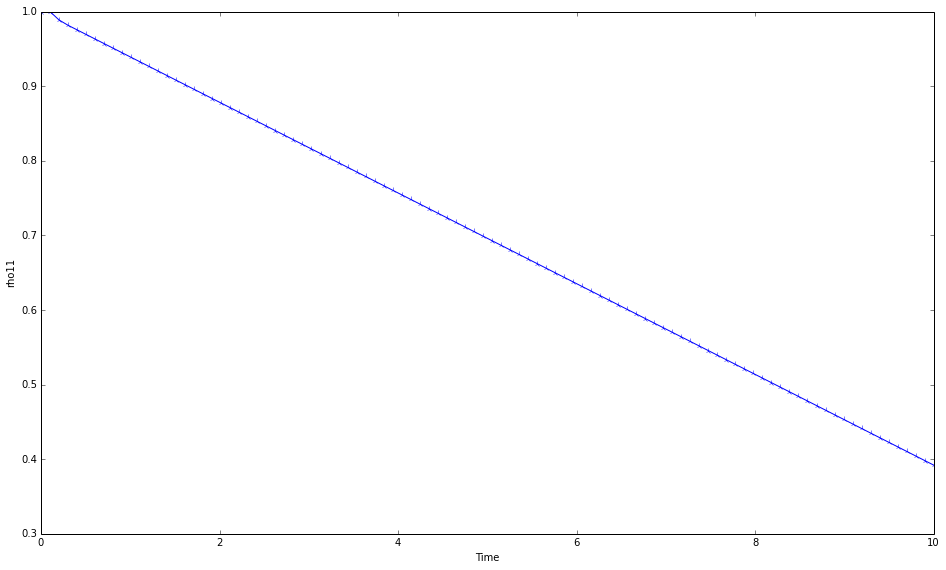

In [38]:
plt.figure(figsize=(16,9.36))
plt.ylabel('rho11')
plt.xlabel('Time')
plt11=plt.plot(plttlin,pltdata11,"b4-",label="vac_rho11")
#plt.plot(plttlin,pltdata11Test,"m4-",label="vac_rho11Test")
plt.show()
#py.iplot_mpl(plt.gcf(),filename="vac_HG-rho11")


# tls.embed("https://plot.ly/~emptymalei/73/")

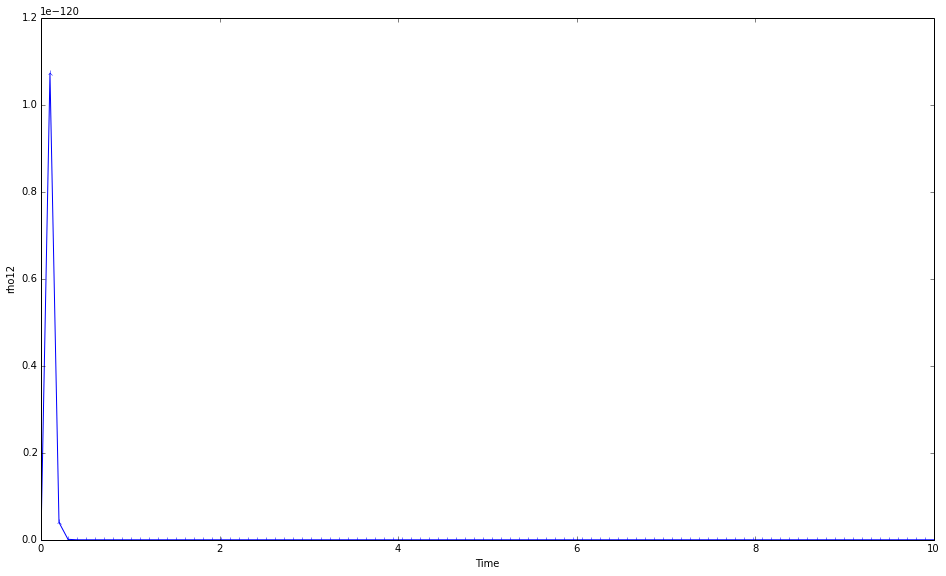

In [39]:
plt.figure(figsize=(16,9.36))
plt.ylabel('rho12')
plt.xlabel('Time')
plt12=plt.plot(plttlin,pltdata12,"b4-",label="vac_rho12")
#plt.plot(plttlin,pltdata11Test,"m4-",label="vac_rho11Test")
plt.show()
#py.iplot_mpl(plt.gcf(),filename="vac_HG-rho11")


# tls.embed("https://plot.ly/~emptymalei/73/")

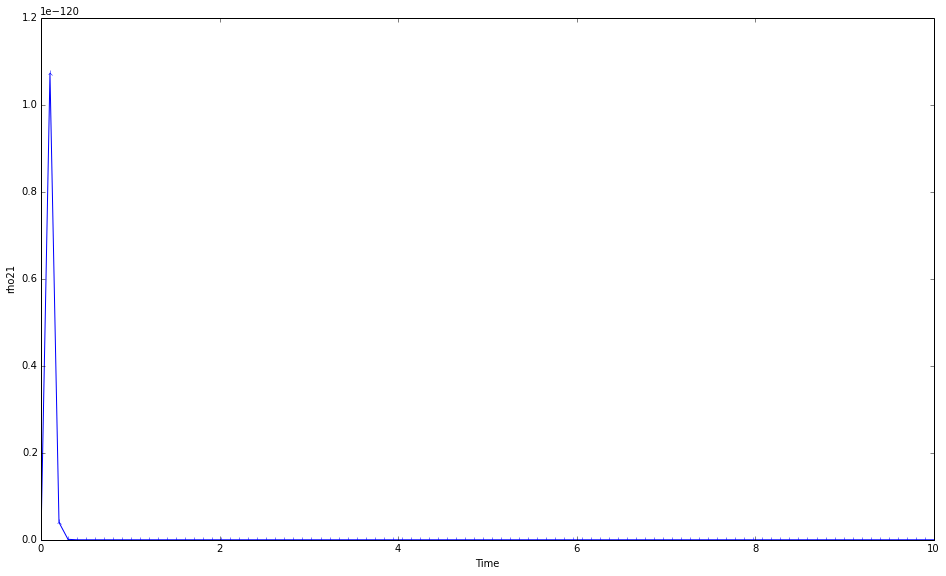

In [40]:
plt.figure(figsize=(16,9.36))
plt.ylabel('rho21')
plt.xlabel('Time')
plt11=plt.plot(plttlin,pltdata21,"b4-",label="vac_rho21")
#plt.plot(plttlin,pltdata11Test,"m4-",label="vac_rho11Test")
plt.show()
#py.iplot_mpl(plt.gcf(),filename="vac_HG-rho11")


# tls.embed("https://plot.ly/~emptymalei/73/")

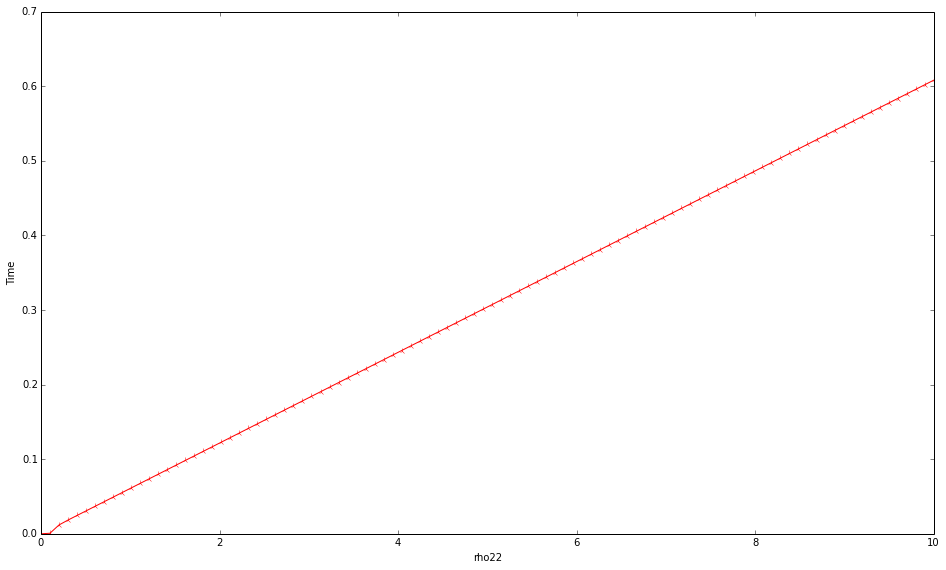

In [41]:
plt.figure(figsize=(16,9.36))
plt.ylabel('Time')
plt.xlabel('rho22')
plt22=plt.plot(plttlin,pltdata22,"r4-",label="vac_rho22")
plt.show()
#py.iplot_mpl(plt.gcf(),filename="vac_HG-rho22")

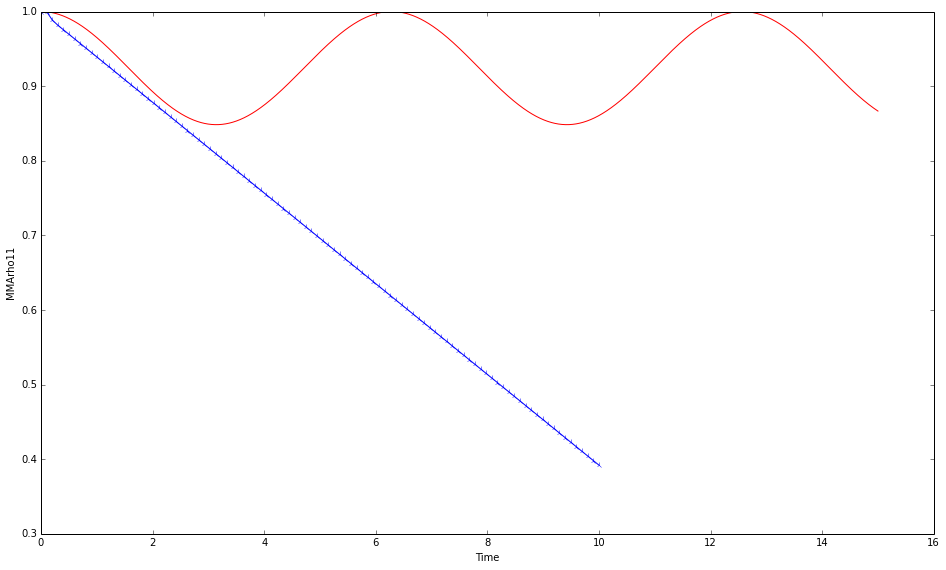

In [42]:
MMA_optmize_Vac_pltdata = np.genfromtxt('./assets/homogen/MMA_optmize_Vac_pltdata.txt', delimiter = ',')

plt.figure(figsize=(16,9.36))
plt.ylabel('MMArho11')
plt.xlabel('Time')
plt.plot(np.linspace(0,15,4501),MMA_optmize_Vac_pltdata,"r-",label="MMAVacrho11")
plt.plot(plttlin,pltdata11,"b4-",label="vac_rho11")
plt.show()
#py.iplot_mpl(plt.gcf(),filename="MMA-rho11-Vac-80-60")

## Practice

In [ ]:
xtemp1 = np.arange(4)
xtemp1.shape = (2,2)
print xtemp1
xtemp1[0,1]
np.dot(xtemp1,xtemp1)
xtemp1[0,1]